# PyTorch Basics

# Setting up your environment


## Google Colab
PyTorch is already installed and ready to be used on Google Colab. <br>
By default all Colab notebooks will use the CPU for computation, unless switched to a GPU Runtime.<br> For this tutorial you will only use the CPU Runtime

## Local Runtime
Alternatively, if you can run this on your local machine

# Getting started with PyTorch
We will start off with a simple problem statement, and how we would go about solving it with PyTorch
## Problem Statement-
Classification of the MNIST Hand-Written Digits Dataset.
<br> The dataset consists of images of hand-written digits along with their respective numeric labels.
## Description-
This is essentially the 'Hello World' program for Deep Learning with PyTorch, it will give you an overview of what is happening before you dive into more detailed topics.
<br> The task at hand is to classify images of hand-written digits to their respective value. <br>
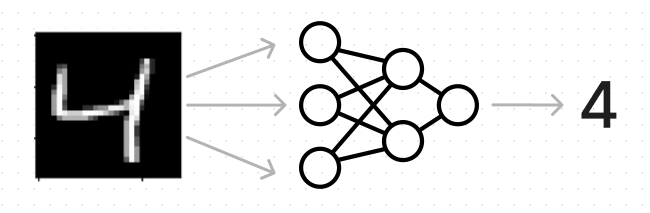

# Imports

In [6]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch                     # main PyTorch import

Looking in indexes: https://download.pytorch.org/whl/cu118


# Downloading, Visualising and Loading the MNIST Dataset
For this tutorial, you will be using the MNIST Dataset, which is available as part of the 'torchvision' package.

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())

test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

#### 1) What is ```torchvision``` and ```datasets```?
TorchVision is an accompanying library that consists of commonly used datasets, models and image transformation techniques used in computer Vision.
<br>
```datasets``` allows us to load and use pre-included datasets like MNIST.
#### 2) What is ```torchvision.transforms``` and ```ToTensor```?
Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters ```transform``` to modify the features and ```target_transform``` to modify the labels.

```ToTensor``` is a type of transform that will convert the image data into tensor data.

#### 3) What are ```root```, ```train```, ```download``` and ```transform``` parameters?
```root```- specifies the root directory <br>
```train```- specifes whether you are loading the training or testing portion of the dataset <br>
```download```- specifies whether the dataset is to be downloaded from the internet or use the locally downloaded copy <br>
```transform```- specifies which transformation is to be applied to the dataset

### Check your loaded dataset-


In [8]:
print(train_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

This is the first sample of our Training Dataset. It should be a large tensor with seemingly meaningless numbers, but is actually the image data in tensor form.

## Visualising your dataset-
To view your dataset which is currently in tensor form, we can use the library ```matplotlib``` to read the tensor data and plot back into images.


<function matplotlib.pyplot.show(close=None, block=None)>

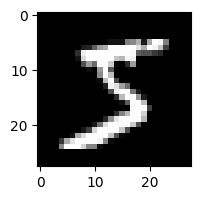

In [9]:
!pip install matplotlib
import matplotlib.pyplot as plt
singleFigure = plt.figure(figsize=(2,2))
img, label = train_data[0]
plt.imshow(img.squeeze(), cmap = "gray")
plt.show

Visualising Multiple

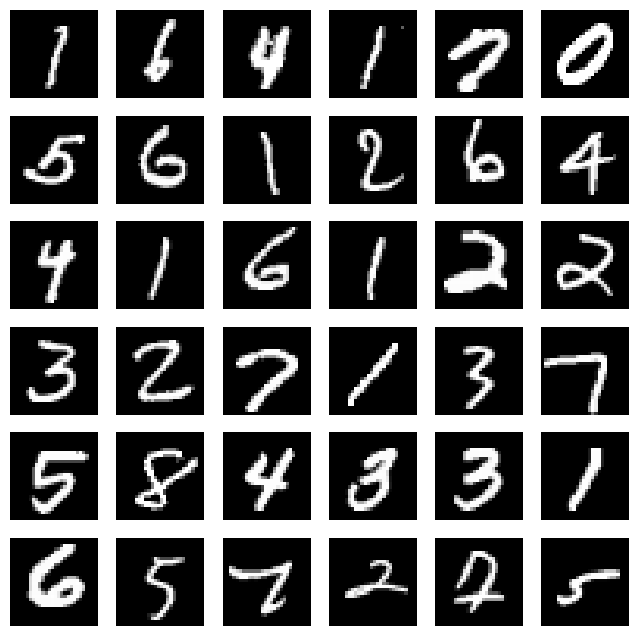

In [10]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 6, 6

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Viewing the labels of your Dataset

In [11]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Number of Samples

In [12]:
print("Number of training instances: ",len(train_data))
print("Number of testing samples: ", len(test_data))

Number of training instances:  60000
Number of testing samples:  10000


## Setup DataLoader
while ```Datasets``` retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

```DataLoader``` is an iterable object that allows us to perform the above mentioned task.

In [13]:
from torch.utils.data import DataLoader

loaded_train = DataLoader(train_data, batch_size=100, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=100, shuffle=True)

Additionally, you can club these two into a single dictionary for your convenience-

In [14]:
loaders = {
    'train' : loaded_train,
    'test': loaded_test}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1f160e65510>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1f160e677c0>}

In [15]:
print("Number of training batches: ",len(loaders['train']))
print("Number of testing batches: ",len(loaders['test']))

Number of training batches:  600
Number of testing batches:  100


# Building the Neural Network
With the Dataset now ready, we can start working on the Neural Network itself.
<br>
You will be building the following network- <br>
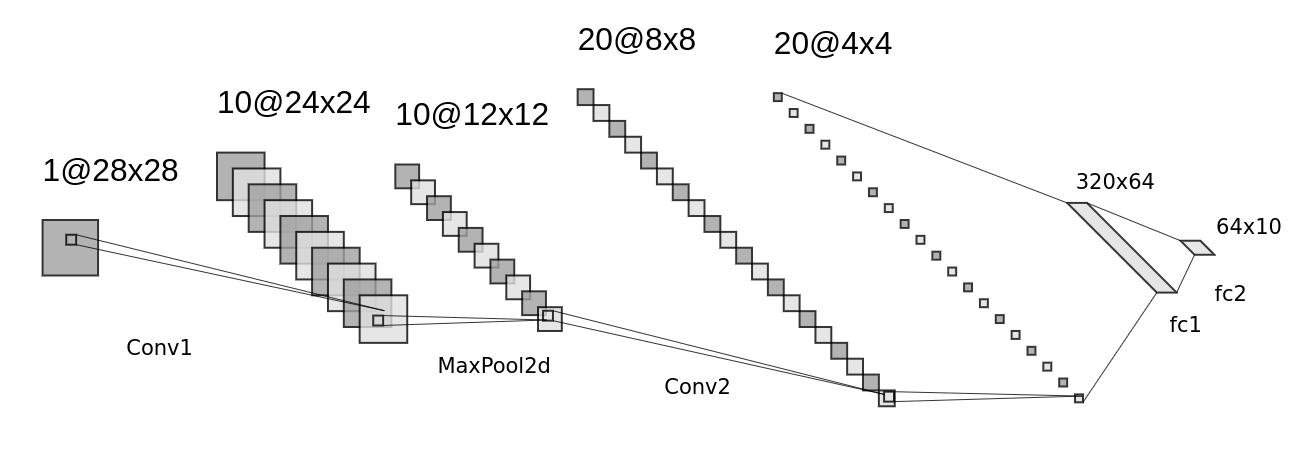
<br>
There are a mulitude of ways PyTorch allows you to build out your network, for this example you will be building the network using a mixture of different approaches, and usually considered best practice.

### 1) How to start off building the network?
You must start off building your network by inheriting the main PyTorch ```nn.module``` class.
This is the PyTorch base class meant to encapsulate behaviours specific to PyTorch Models and their components.

### 2) What is the ```__init__``` function?
The `__init__` function is where you specify the layers of your network

### 3) What is the ```forward``` function?
The `forward` function is where you specify how the input to the network must propogate through the layers of the network. The output of the model is also mapped here as the return statement.
The data typically is propogated through the network by overwriting the variable with the new updated values as they pass through the layers.

In [16]:
from torch import nn
import torch.nn.functional as F

class MNIST_CNN(nn.Module):
  def __init__(self):
    super(MNIST_CNN, self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels = 1,
                  out_channels = 10,
                  kernel_size = 5,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
        )

    self.conv2 = nn.Sequential(
        nn.Conv2d(10,20,5,1,0),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )

    self.fc1 = nn.Linear(20*4*4, 64)
    self.fc2 = nn.Linear(64,10)
    self.softmax = nn.LogSoftmax()

  def forward(self, x):
    in_size = x.size(0)
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(in_size, -1)   # flatten the tensor
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

`view` function - is used to flatten the tensors
### Why specifically these layers and activations are chosen?
The design of the network is entirely dependant on the task at hand, and this convolution neural network with the appropriate activations allows us to accurately predict for the task at hand.


## Initialise your Model

In [17]:
mnist_cnn = MNIST_CNN()
print(mnist_cnn)

MNIST_CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=320, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=None)
)


## Define a loss function
since the task at hand is to predict a single value from multiple possible classes, the `cross entropy loss function` in being used.

In [18]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

## Define an Optimization Function
Define the required optimiser along with the desired learning rate.

In [19]:
from torch import optim
optimizer = optim.Adam(mnist_cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

# Training the Network
This function will allow you to train your model, by appropriately handling the backward propogations along with the optimizer.
<br>The function is typically written to take in the dataset, model, loss function and optimizer.

PyTorch trains in batches, so the `batch_id` will keep track of which batch of data you are working on.

**Keep in mind the number of batches is how many were set in the data loader in the previous section**

In [20]:
def train(loaders, model, loss_func, optimizer):
  model.train()
  size = len(loaders['train'])
  for batch_id, (X,y) in enumerate(loaders['train']):

    predicted_output = model(X)
    actual_output = y
    # print(predicted_output, actual_output)
    loss = loss_func(predicted_output, actual_output)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (batch_id+1) % 100 == 0:
      loss, current = loss.item(),batch_id
      print(f"Loss: {loss:>7f} \n Batch: [{current+1:>5d}/{size:>5d}]")

`model.train()` sets the model into 'training' mode. It is a mode that when enabled, PyTorch will perform training specific functions such as Dropout layers.
<br>
Running `model(X)` will run the input through the model and return a prediction.
<br> Running the chosen loss function will return the loss
<br> `optimizer.zero_grad()` will reset the gradients of the optimizer to zero for every batch
<br> `loss.backward` is where the back propogation happens. It keeps a history of the order of the layers and how the data propogated through, thus automatically able to calculate the gradient for every parameter in the network
<br> `optimizer.step()` will update the parameters based on the gradients calculated previously.

#### Calling the `train` function
With the `train` function defined, you can call it for how many ever epochs are required.


In [21]:
num_epochs = 2
for epoch in range(num_epochs):
  print(f"Epoch {epoch+1}\n-------------------------------")
  train(loaders, mnist_cnn, loss_func, optimizer)

Epoch 1
-------------------------------


d:\Guild\TDL_TA\.conda\lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Loss: 0.061010 
 Batch: [  100/  600]
Loss: 0.092394 
 Batch: [  200/  600]
Loss: 0.251808 
 Batch: [  300/  600]
Loss: 0.025619 
 Batch: [  400/  600]
Loss: 0.080085 
 Batch: [  500/  600]
Loss: 0.073235 
 Batch: [  600/  600]
Epoch 2
-------------------------------
Loss: 0.068911 
 Batch: [  100/  600]
Loss: 0.028919 
 Batch: [  200/  600]
Loss: 0.108664 
 Batch: [  300/  600]
Loss: 0.069008 
 Batch: [  400/  600]
Loss: 0.096929 
 Batch: [  500/  600]
Loss: 0.141265 
 Batch: [  600/  600]


# Testing the Network
Similar to how you defined and ran the `train` function, you can define and run a `test` function.

This function is typically written to calculate the Accuracy along with the Loss.

To calculate the accuracy, you will have to compare the actual labels of your prediction and target itself.

Since the final layer was a Softmax activation, the output will be 10 class probabilities, with the highest probability being the predicted output.

You can extract this value with the `argmax()` function.

Keep in mind you will have to convert it to the appropriate datatypes

`model.eval()` sets the model into Evaluation/Inference mode, it is the opposite of `model.train()`.

In [22]:
def test(loaders, model, loss_func, optimizer):
  size = len(loaders['test'])*100
  test_loss, correct = 0,0
  model.eval()
  with torch.no_grad():
    for batch_id,(X, y) in enumerate(loaders['test']):
      predicted_output = model(X)
      actual_output = y
      test_loss = loss_func(predicted_output, actual_output)
      correct += (predicted_output.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= size
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}")

In [23]:
test(loaders, mnist_cnn, loss_func, optimizer)

Test Error: 
 Accuracy: 97.8


# Check your understanding

## Do it yourself - Network Data Flow
- Modify the appropriate network function, to view the structure of the data as it flows
through the network.
  - print to the console the shape of the different stages of your data as it flows through the network
- You can use the `.size()` command to view the shape of the tensors

ANS - modify the forward function with print statements to view the

In [24]:
from torch import nn
import torch.nn.functional as F

class mnist_cnn_modified(nn.Module):
  def __init__(self):
    super(mnist_cnn_modified, self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels = 1,
                  out_channels = 10,
                  kernel_size = 5,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
        )

    self.conv2 = nn.Sequential(
        nn.Conv2d(10,20,5,1,0),
        nn.ReLU(),
        nn.MaxPool2d(2)
        )

    self.fc1 = nn.Linear(20*4*4, 64)
    self.fc2 = nn.Linear(64,10)
    self.softmax = nn.LogSoftmax()

  def forward(self, x):
    in_size = x.size(0)
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(in_size, -1)   # flatten the tensor
    x = self.fc1(x)
    x = self.fc2(x)
    print("FC2\n", x.size())
    x = self.softmax(x)
    return x

Initialise the new modified model

In [25]:
mnist_fcnn_modified = mnist_cnn_modified()

iterate over one sample

In [26]:
#ITERATING OVER JUST ONE SAMPLE
cnt = 0
for batch, (X,y) in enumerate(loaders['train']):
  if cnt == 0:
    predicted = mnist_fcnn_modified.forward(X)
  else:
    break
  cnt += 1


FC2
 torch.Size([100, 10])


## Question - Understand how `argmax()` work?
- `argmax()` returns the index of the element that has the highest value in the tensor, that is present along the provided dimension.
- the `dim` argument allows us to determine along which dimension we want to check for the maximum.
  - 1 - along each row (horizontal)
  - 0 - along each columns (vertical)
- run the `.argmax()` function over the following tensor and observe the results

In [27]:
tensor_a = torch.rand(3,4)
print("Tensor A-", tensor_a)

print("Along Dimension 0 (Columns) - ",tensor_a.argmax(dim=0))
print("Along Dimension 1 (Rows) - ",tensor_a.argmax(dim=1))

Tensor A- tensor([[0.2895, 0.7307, 0.8823, 0.3679],
        [0.1653, 0.5428, 0.0983, 0.4293],
        [0.5455, 0.2659, 0.2034, 0.4208]])
Along Dimension 0 (Columns) -  tensor([2, 0, 0, 1])
Along Dimension 1 (Rows) -  tensor([2, 1, 0])


Clearly you can observe `dim=0` return a tensor of shape 1x4, indicating that it has returned the indices of the highest value within each of the columns, and `dim=1` returns a tensor of shape 1x3, indicating that it has returned the indices of the highest value within each of the rows

### Q) Based on the dimensions of the data for the MNIST example, which you have just printed in the previous section, why has `dim=1` been chosen for the argmax function during testing?
ANS-
- each batch is read with 100 samples
- so its 100 rows of 10 values(softmax output) each. [100x10]
- dim = 1 returns the index of the max value along the rows
- therefore it returns an array of size [1x100], with the class of the highest probability each of the 100 samples  